# SciPy Interpolate

In [1]:
# Imports required but not shown in the video lecture.
import numpy as np
from numpy import genfromtxt, arange, set_printoptions
from scipy.misc.pilutil import imread
from matplotlib.pyplot import imshow, plot, title, axis, xlabel, ylabel
%matplotlib inline

In [2]:
set_printoptions(precision=2, suppress=True)

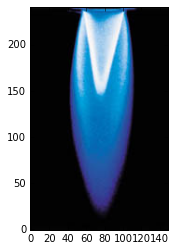

In [3]:
flame = imread("CH4_flame.jpeg")
i = imshow(flame,origin="lower")

data from http://kinetics.nist.gov/janaf/html/C-067.txt

In [6]:
data = genfromtxt("JANAF_CH4.txt", 
                  delimiter="\t",
                  skip_header=1,
                  names=True,
                  missing_values="INFINITE",
                  filling_values=np.inf)

In [7]:
for row in data[:7]:
    print "{}\t{}".format(row['TK'], row['Cp'])
print "...\t..."

0.0	0.0
100.0	33.258
200.0	33.473
250.0	34.216
298.15	35.639
300.0	35.708
350.0	37.874
...	...


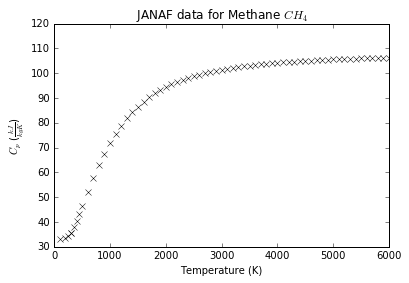

In [8]:
p = plot(data['TK'], data['Cp'], 'kx')
t = title("JANAF data for Methane $CH_4$")
a = axis([0, 6000, 30, 120])
x = xlabel("Temperature (K)")
y = ylabel(r"$C_p$ ($\frac{kJ}{kg K}$)")


In [9]:
from scipy.interpolate import interp1d

In [10]:
#creates callable function. TK is X and Cp is Y.
ch4_cp = interp1d(data['TK'], data['Cp'])

In [11]:
print ch4_cp(302.2)

35.803304


In [ ]:
# This is raising an exception because that requires extrapolation
print ch4_cp(6010)

In [12]:
# With option bounds_error=False, interp1d won't raise an exception on extrapolation
ch4_cp = interp1d(data['TK'], data['Cp'],
                  bounds_error=False)
print ch4_cp(6010)

nan


In [13]:
ch4_cp = interp1d(data['TK'], data['Cp'],
                  bounds_error=False, fill_value=-999.25)
print ch4_cp(6010)

-999.25


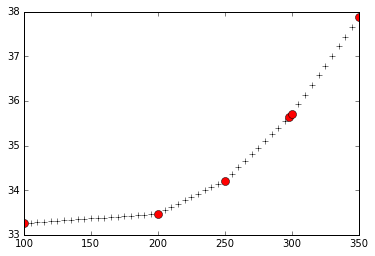

In [14]:
#linear interpolation fills with straight line.
T = arange(100,355,5)
plot(T, ch4_cp(T), "+k")
p = plot(data['TK'][1:7], data['Cp'][1:7], 'ro', markersize=8)

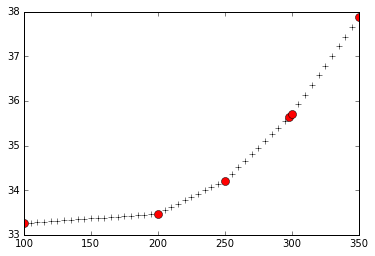

In [15]:
cp_ch4 = interp1d(data['TK'], data['Cp'], kind="linear")
p = plot(T, cp_ch4(T), "k+")
p = plot(data['TK'][1:7], data['Cp'][1:7], 'ro', markersize=8)

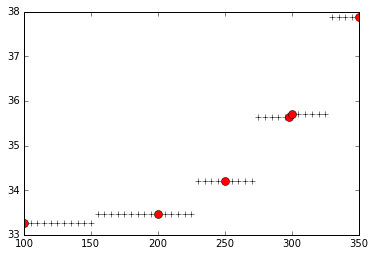

In [16]:
cp_ch4 = interp1d(data['TK'], data['Cp'], kind="nearest")
p = plot(T, cp_ch4(T), "k+")
p = plot(data['TK'][1:7], data['Cp'][1:7], 'ro', markersize=8)

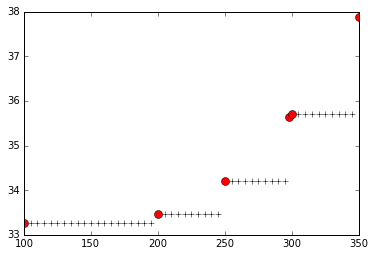

In [17]:
cp_ch4 = interp1d(data['TK'], data['Cp'], kind="zero")
p = plot(T, cp_ch4(T), "k+")
p = plot(data['TK'][1:7], data['Cp'][1:7], 'ro', markersize=8)

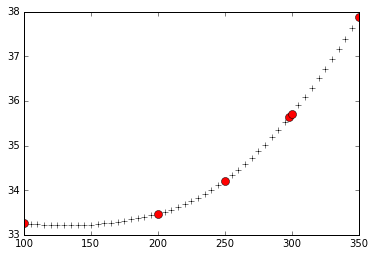

In [18]:
cp_ch4 = interp1d(data['TK'], data['Cp'], kind="quadratic")
p = plot(T, cp_ch4(T), "k+")
p = plot(data['TK'][1:7], data['Cp'][1:7], 'ro', markersize=8)

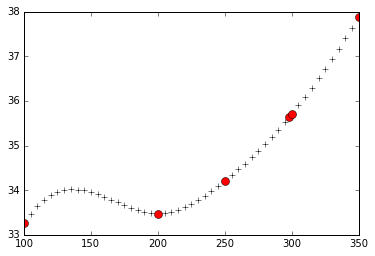

In [19]:
cp_ch4 = interp1d(data['TK'], data['Cp'], kind="cubic")
p = plot(T, cp_ch4(T), "k+")
p = plot(data['TK'][1:7], data['Cp'][1:7], 'ro', markersize=8)

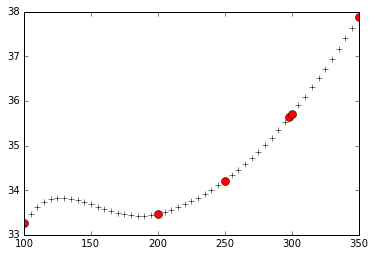

In [20]:
cp_ch4 = interp1d(data['TK'], data['Cp'], kind=4)
p = plot(T, cp_ch4(T), "k+")
p = plot(data['TK'][1:7], data['Cp'][1:7], 'ro', markersize=8)

In [21]:
from scipy.interpolate import interp2d, interpnd

Copyright 2008-2016, Enthought, Inc.  
Use only permitted under license.  Copying, sharing, redistributing or other unauthorized use strictly prohibited.  
http://www.enthought.com